## Final Project Submission

Please fill out:
* Student name: Isabella Lindgren
* Student pace: part time
* Scheduled project review date/time: 
* Instructor name: Eli Thomas
* Blog post URL: 


# Diagnosing Heart Disease

The data I used for my module 5 project is the Heart Disease UCI dataset which I obtained from Kaggle: https://www.kaggle.com/ronitf/heart-disease-uci <br/>

## Contents <br/>
1. Introduction
2. Exploratory Data Analysis
3. Feature Engineering
4. Modeling (3 Models)- check with performance metrics
5. Conclusions


# Introduction/Business Understanding

What performance metric is the most applicable to your model? Why? Always refer to the life cycle

According to the Centers for Disease Control (CDC), heart disease is the leading cause of death for men, women, and people of most racial and ethnic groups in the US. Approximately 647,000 Americans die from heart disease each year, which is 1 in every 4 deaths. 

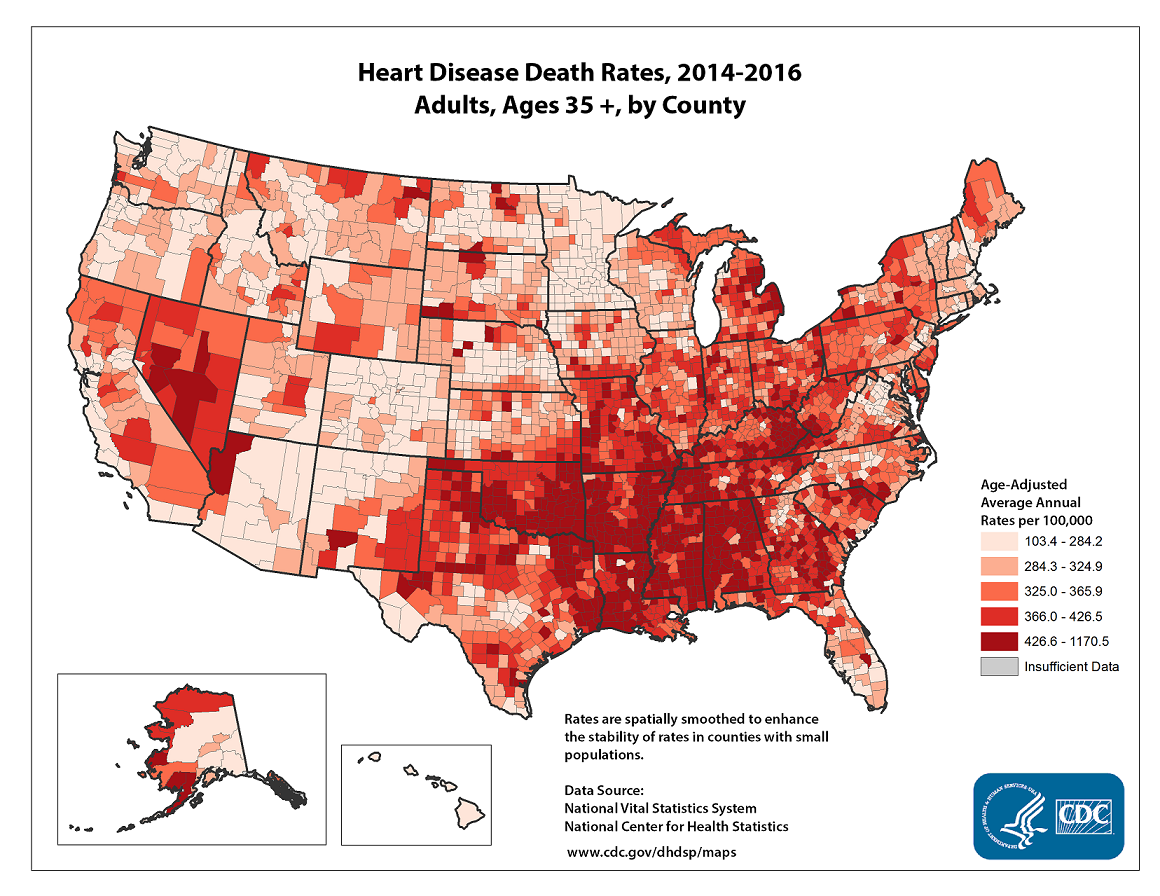
<br/>
Source: https://www.cdc.gov/heartdisease/facts.htm

Heart disease is diagnosed by first taking the family medical history, recording current and past symptoms, and then running various tests (i.e. electrocardiograms, CT scans, blood tests). 
<br/>
<br/>
Major risk factors for heart disease are **high blood pressure, high blood cholesterol, and smoking**. About half of Americans (47%) have at least one of these three factors. Other important factors are **diabetes, stress, obesity, nutrition, physical activity and family history.**
<br/>
<br/>
These factors could be separated into two separate categories: inherent and behavioural. Inherent factors cannot be changed, such as age, family history, diabetes and sex. Risk factors that are behavioural can be changed, such as smoking, alcohol use, high cholesterol, high blood pressure, physical activity, obesity, stress, and poor diet. 

### About the data: <br/>
This database contains 76 attributes, but all published experiments refer to using a subset of 14 of them. In particular, the Cleveland database is the only one that has been used by ML researchers to this date. The "goal" field refers to the presence of heart disease in the patient. It is integer valued from 0 (no presence) to 4.
<br/>
<br/>
Attribute Information:
> 1. age: The person's age in years
> 2. sex
> 3. cp: chest pain type (4 values)
> 4. trestbps: resting blood pressure
> 5. chol: serum cholestoral in mg/dl (1 = true; 0 = false)
> 6. fbs: fasting blood sugar > 120 mg/dl (1 = true; 0 = false)
> 7. restecg: resting electrocardiographic results (values 0,1,2)
> 8. thalach: maximum heart rate achieved
> 9. exang: exercise induced angina
> 10. oldpeak: ST depression induced by exercise relative to rest
> 11. slope: the slope of the peak exercise ST segment
> 12. ca: number of major vessels (0-3) colored by flourosopy
> 13. thal: a blood disorder called Thalassemia 3 = normal; 6 = fixed defect; 7 = reversable defect (hereditary)
> 14. target: heart disease (0 = no; 1 = yes)

In [219]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns #for plotting

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier #for the model
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import export_graphviz #plot tree
from sklearn.metrics import roc_curve, auc #for model evaluation
from sklearn.metrics import classification_report #for model evaluation
from sklearn.metrics import confusion_matrix #for model evaluation
#!pip install eli5
import eli5 #for permutation importance
from eli5.sklearn import PermutationImportance

import warnings
warnings.simplefilter('ignore')

In [299]:
df = pd.read_csv('heart.csv')
df.head()

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   

   ca  thal  target  
0   0     1       1  
1   0     2       1  
2   0     2       1  
3   0     2       1  
4   0     2       1

Let's change the column names so that they are easier to understand.

In [300]:
df.columns = ['age', 'sex', 'chest_pain_type', 'resting_blood_pressure', 'cholesterol', 'fasting_blood_sugar', 'rest_ecg', 'max_heart_rate_achieved',
       'exercise_induced_angina', 'st_depression', 'st_slope', 'num_major_vessels', 'thalassemia', 'target']

In [301]:
df.head()

age  sex  chest_pain_type  resting_blood_pressure  cholesterol  \
0   63    1                3                     145          233   
1   37    1                2                     130          250   
2   41    0                1                     130          204   
3   56    1                1                     120          236   
4   57    0                0                     120          354   

   fasting_blood_sugar  rest_ecg  max_heart_rate_achieved  \
0                    1         0                      150   
1                    0         1                      187   
2                    0         0                      172   
3                    0         1                      178   
4                    0         1                      163   

   exercise_induced_angina  st_depression  st_slope  num_major_vessels  \
0                        0            2.3         0                  0   
1                        0            3.5         0                  0   
2                        0            1.4         2                  0   
3                        0            0.8         2                  0   
4                        1            0.6         2                  0   

   thalassemia  target  
0            1       1  
1            2       1  
2            2       1  
3            2       1  
4            2       1

# Data Exploration and Manipulation

Let's check the shape of the data and make sure that there are no missing values.

In [302]:
# Let's look at how many rows and columns there are
df.shape

(303, 14)

In [303]:
# check for missing values
df.isna().sum()

age                        0
sex                        0
chest_pain_type            0
resting_blood_pressure     0
cholesterol                0
fasting_blood_sugar        0
rest_ecg                   0
max_heart_rate_achieved    0
exercise_induced_angina    0
st_depression              0
st_slope                   0
num_major_vessels          0
thalassemia                0
target                     0
dtype: int64

In [304]:
# are there any null values?
df.isnull().values.any()

False

In [305]:
df.describe()

age         sex  chest_pain_type  resting_blood_pressure  \
count  303.000000  303.000000       303.000000              303.000000   
mean    54.366337    0.683168         0.966997              131.623762   
std      9.082101    0.466011         1.032052               17.538143   
min     29.000000    0.000000         0.000000               94.000000   
25%     47.500000    0.000000         0.000000              120.000000   
50%     55.000000    1.000000         1.000000              130.000000   
75%     61.000000    1.000000         2.000000              140.000000   
max     77.000000    1.000000         3.000000              200.000000   

       cholesterol  fasting_blood_sugar    rest_ecg  max_heart_rate_achieved  \
count   303.000000           303.000000  303.000000               303.000000   
mean    246.264026             0.148515    0.528053               149.646865   
std      51.830751             0.356198    0.525860                22.905161   
min     126.000000             0.000000    0.000000                71.000000   
25%     211.000000             0.000000    0.000000               133.500000   
50%     240.000000             0.000000    1.000000               153.000000   
75%     274.500000             0.000000    1.000000               166.000000   
max     564.000000             1.000000    2.000000               202.000000   

       exercise_induced_angina  st_depression    st_slope  num_major_vessels  \
count               303.000000     303.000000  303.000000         303.000000   
mean                  0.326733       1.039604    1.399340           0.729373   
std                   0.469794       1.161075    0.616226           1.022606   
min                   0.000000       0.000000    0.000000           0.000000   
25%                   0.000000       0.000000    1.000000           0.000000   
50%                   0.000000       0.800000    1.000000           0.000000   
75%                   1.000000       1.600000    2.000000           1.000000   
max                   1.000000       6.200000    2.000000           4.000000   

       thalassemia      target  
count   303.000000  303.000000  
mean      2.313531    0.544554  
std       0.612277    0.498835  
min       0.000000    0.000000  
25%       2.000000    0.000000  
50%       2.000000    1.000000  
75%       3.000000    1.000000  
max       3.000000    1.000000

We can see that there are a few categorical variables - we will need to hot encode these later.

In [306]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age                        303 non-null int64
sex                        303 non-null int64
chest_pain_type            303 non-null int64
resting_blood_pressure     303 non-null int64
cholesterol                303 non-null int64
fasting_blood_sugar        303 non-null int64
rest_ecg                   303 non-null int64
max_heart_rate_achieved    303 non-null int64
exercise_induced_angina    303 non-null int64
st_depression              303 non-null float64
st_slope                   303 non-null int64
num_major_vessels          303 non-null int64
thalassemia                303 non-null int64
target                     303 non-null int64
dtypes: float64(1), int64(13)
memory usage: 33.2 KB


In [307]:
## Another cool way to see the different variable types is by data profiling
# !pip pandas_profiling
import pandas_profiling
from pandas_profiling import ProfileReport
profile = pandas_profiling.ProfileReport(df)
profile

There are no missing values in this dataset. This is because the data was cleaned previously before being uploaded to Kaggle.

In [308]:
df.target.value_counts()

1    165
0    138
Name: target, dtype: int64

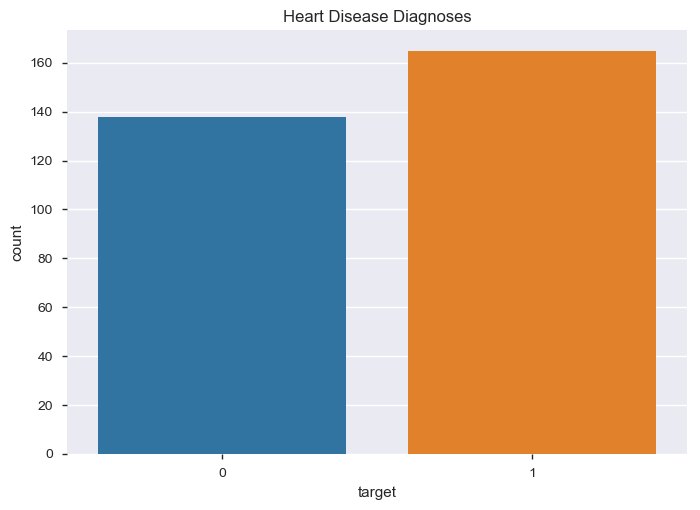

In [309]:
sns.countplot(x='target', data = df)
plt.title('Heart Disease Diagnoses')
plt.show()

There are 165 patients WITH heart disease (target = 1) and 138 patients WITHOUT heart disease (target = 0). Now let's explore various factors and how they relate to the target variable.

In [310]:
df.groupby('sex')['target'].value_counts()

sex  target
0    1          72
     0          24
1    0         114
     1          93
Name: target, dtype: int64

Reminder: 
- for the variable 'sex': (1 = male; 0 = female)
- for the variable 'target': (1 = presence of heart disease; 0 = Absence of heart disease)

So from the data above, we can see that 72 of the total 96 females have heart disease and 24 do not. 93 out of the total 207 males have heart disease and 114 do not. 

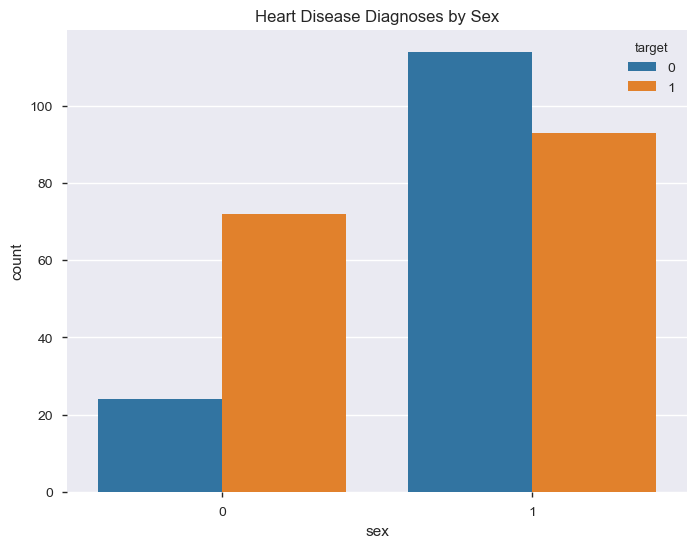

In [311]:
# Visualization of heart disease diagnoses by sex
f, ax = plt.subplots(figsize=(8, 6))
ax = sns.countplot(x="sex", hue="target", data=df)
plt.title('Heart Disease Diagnoses by Sex')
plt.show()

Reminder: fasting blood sugar > 120 mg/dl (1 = true; 0 = false)

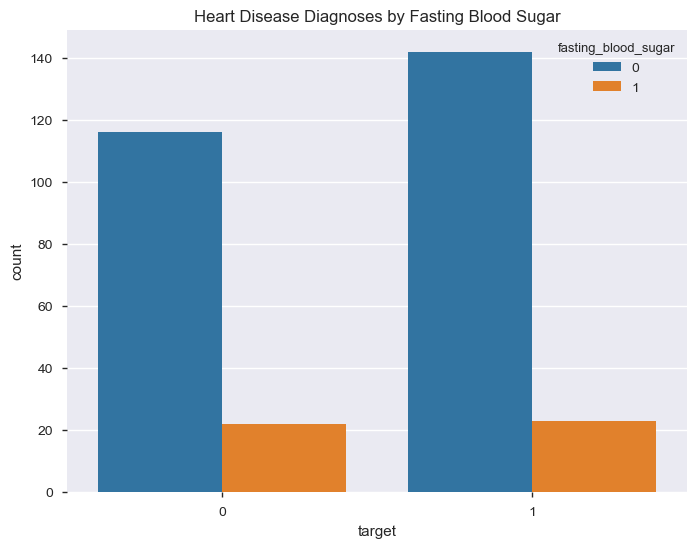

In [312]:
f, ax = plt.subplots(figsize=(8, 6))
ax = sns.countplot(x="target", hue="fasting_blood_sugar", data=df)
plt.title('Heart Disease Diagnoses by Fasting Blood Sugar')
plt.show()

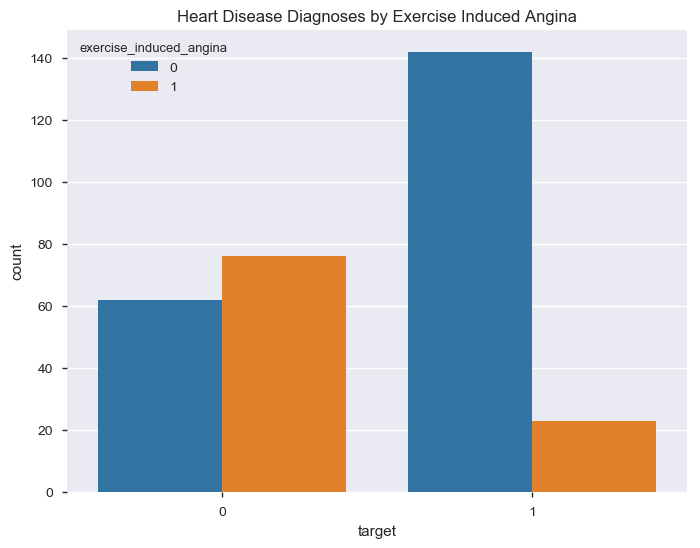

In [313]:
f, ax = plt.subplots(figsize=(8, 6))
ax = sns.countplot(x="target", hue="exercise_induced_angina", data=df)
plt.title('Heart Disease Diagnoses by Exercise Induced Angina')
plt.show()

Now let's get an overview of heart disease diagnoses by age. 

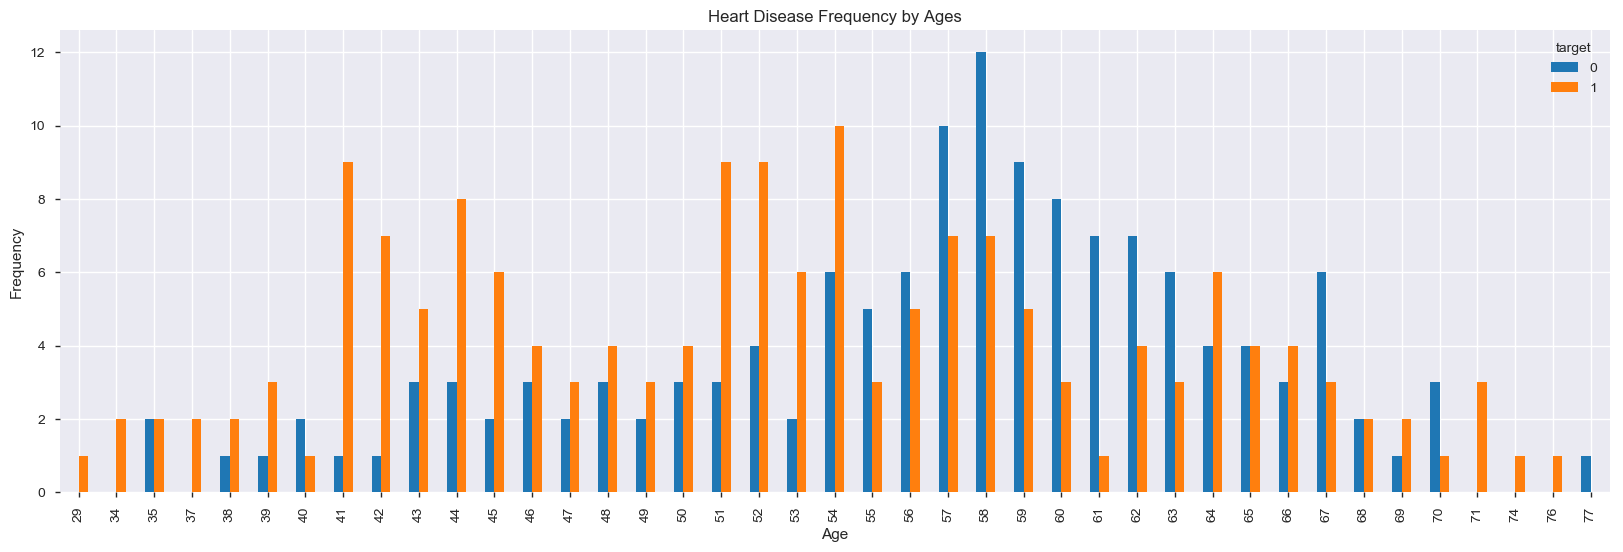

In [314]:
pd.crosstab(df.age, df.target).plot(kind='bar', figsize=(20, 6))
plt.title('Heart Disease Frequency by Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.savefig('heartDiseaseAndAges.png')
plt.show()

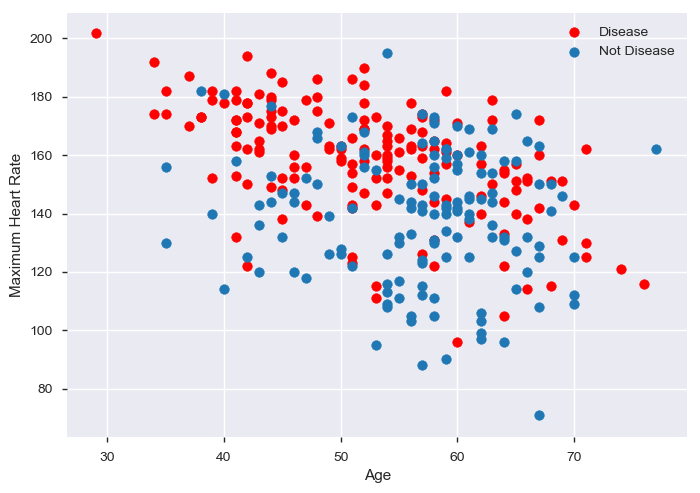

In [315]:
plt.scatter(x=df.age[df.target==1], y=df.max_heart_rate_achieved[(df.target==1)], c="red")
plt.scatter(x=df.age[df.target==0], y=df.max_heart_rate_achieved[(df.target==0)])
plt.legend(["Disease", "Not Disease"])
plt.xlabel("Age")
plt.ylabel("Maximum Heart Rate")
plt.show()

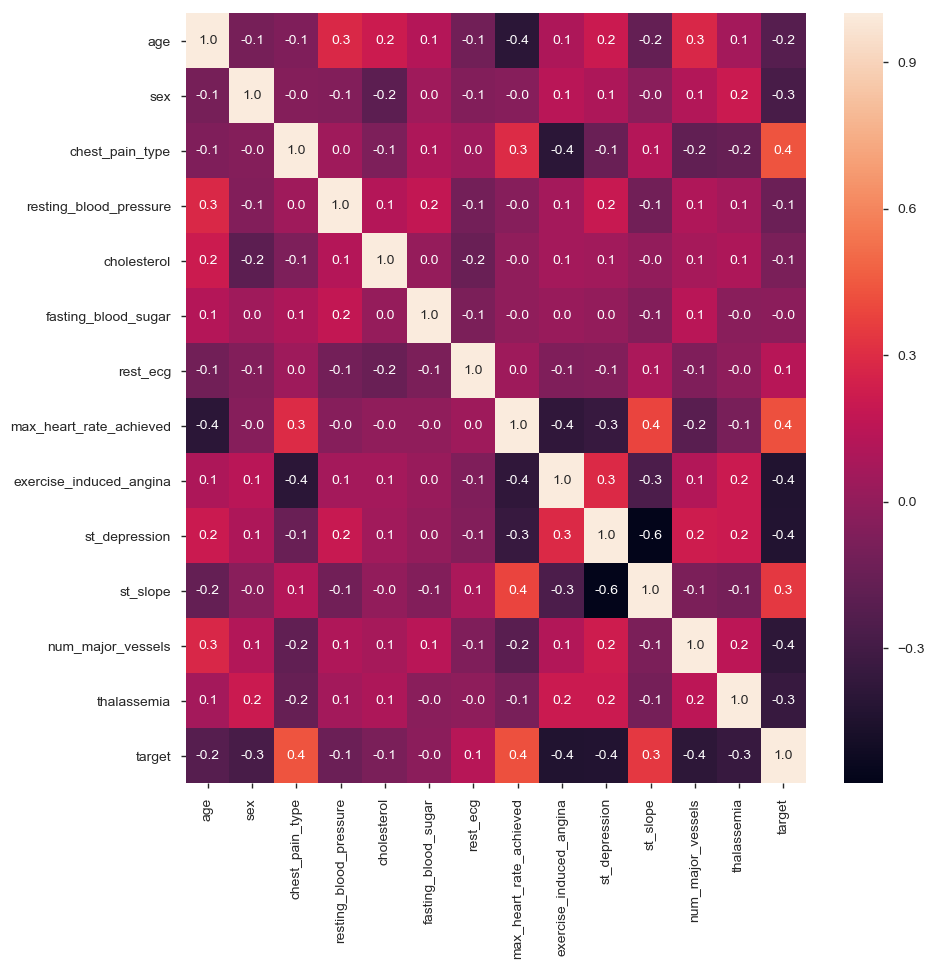

In [316]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True,fmt='.1f')
plt.show()

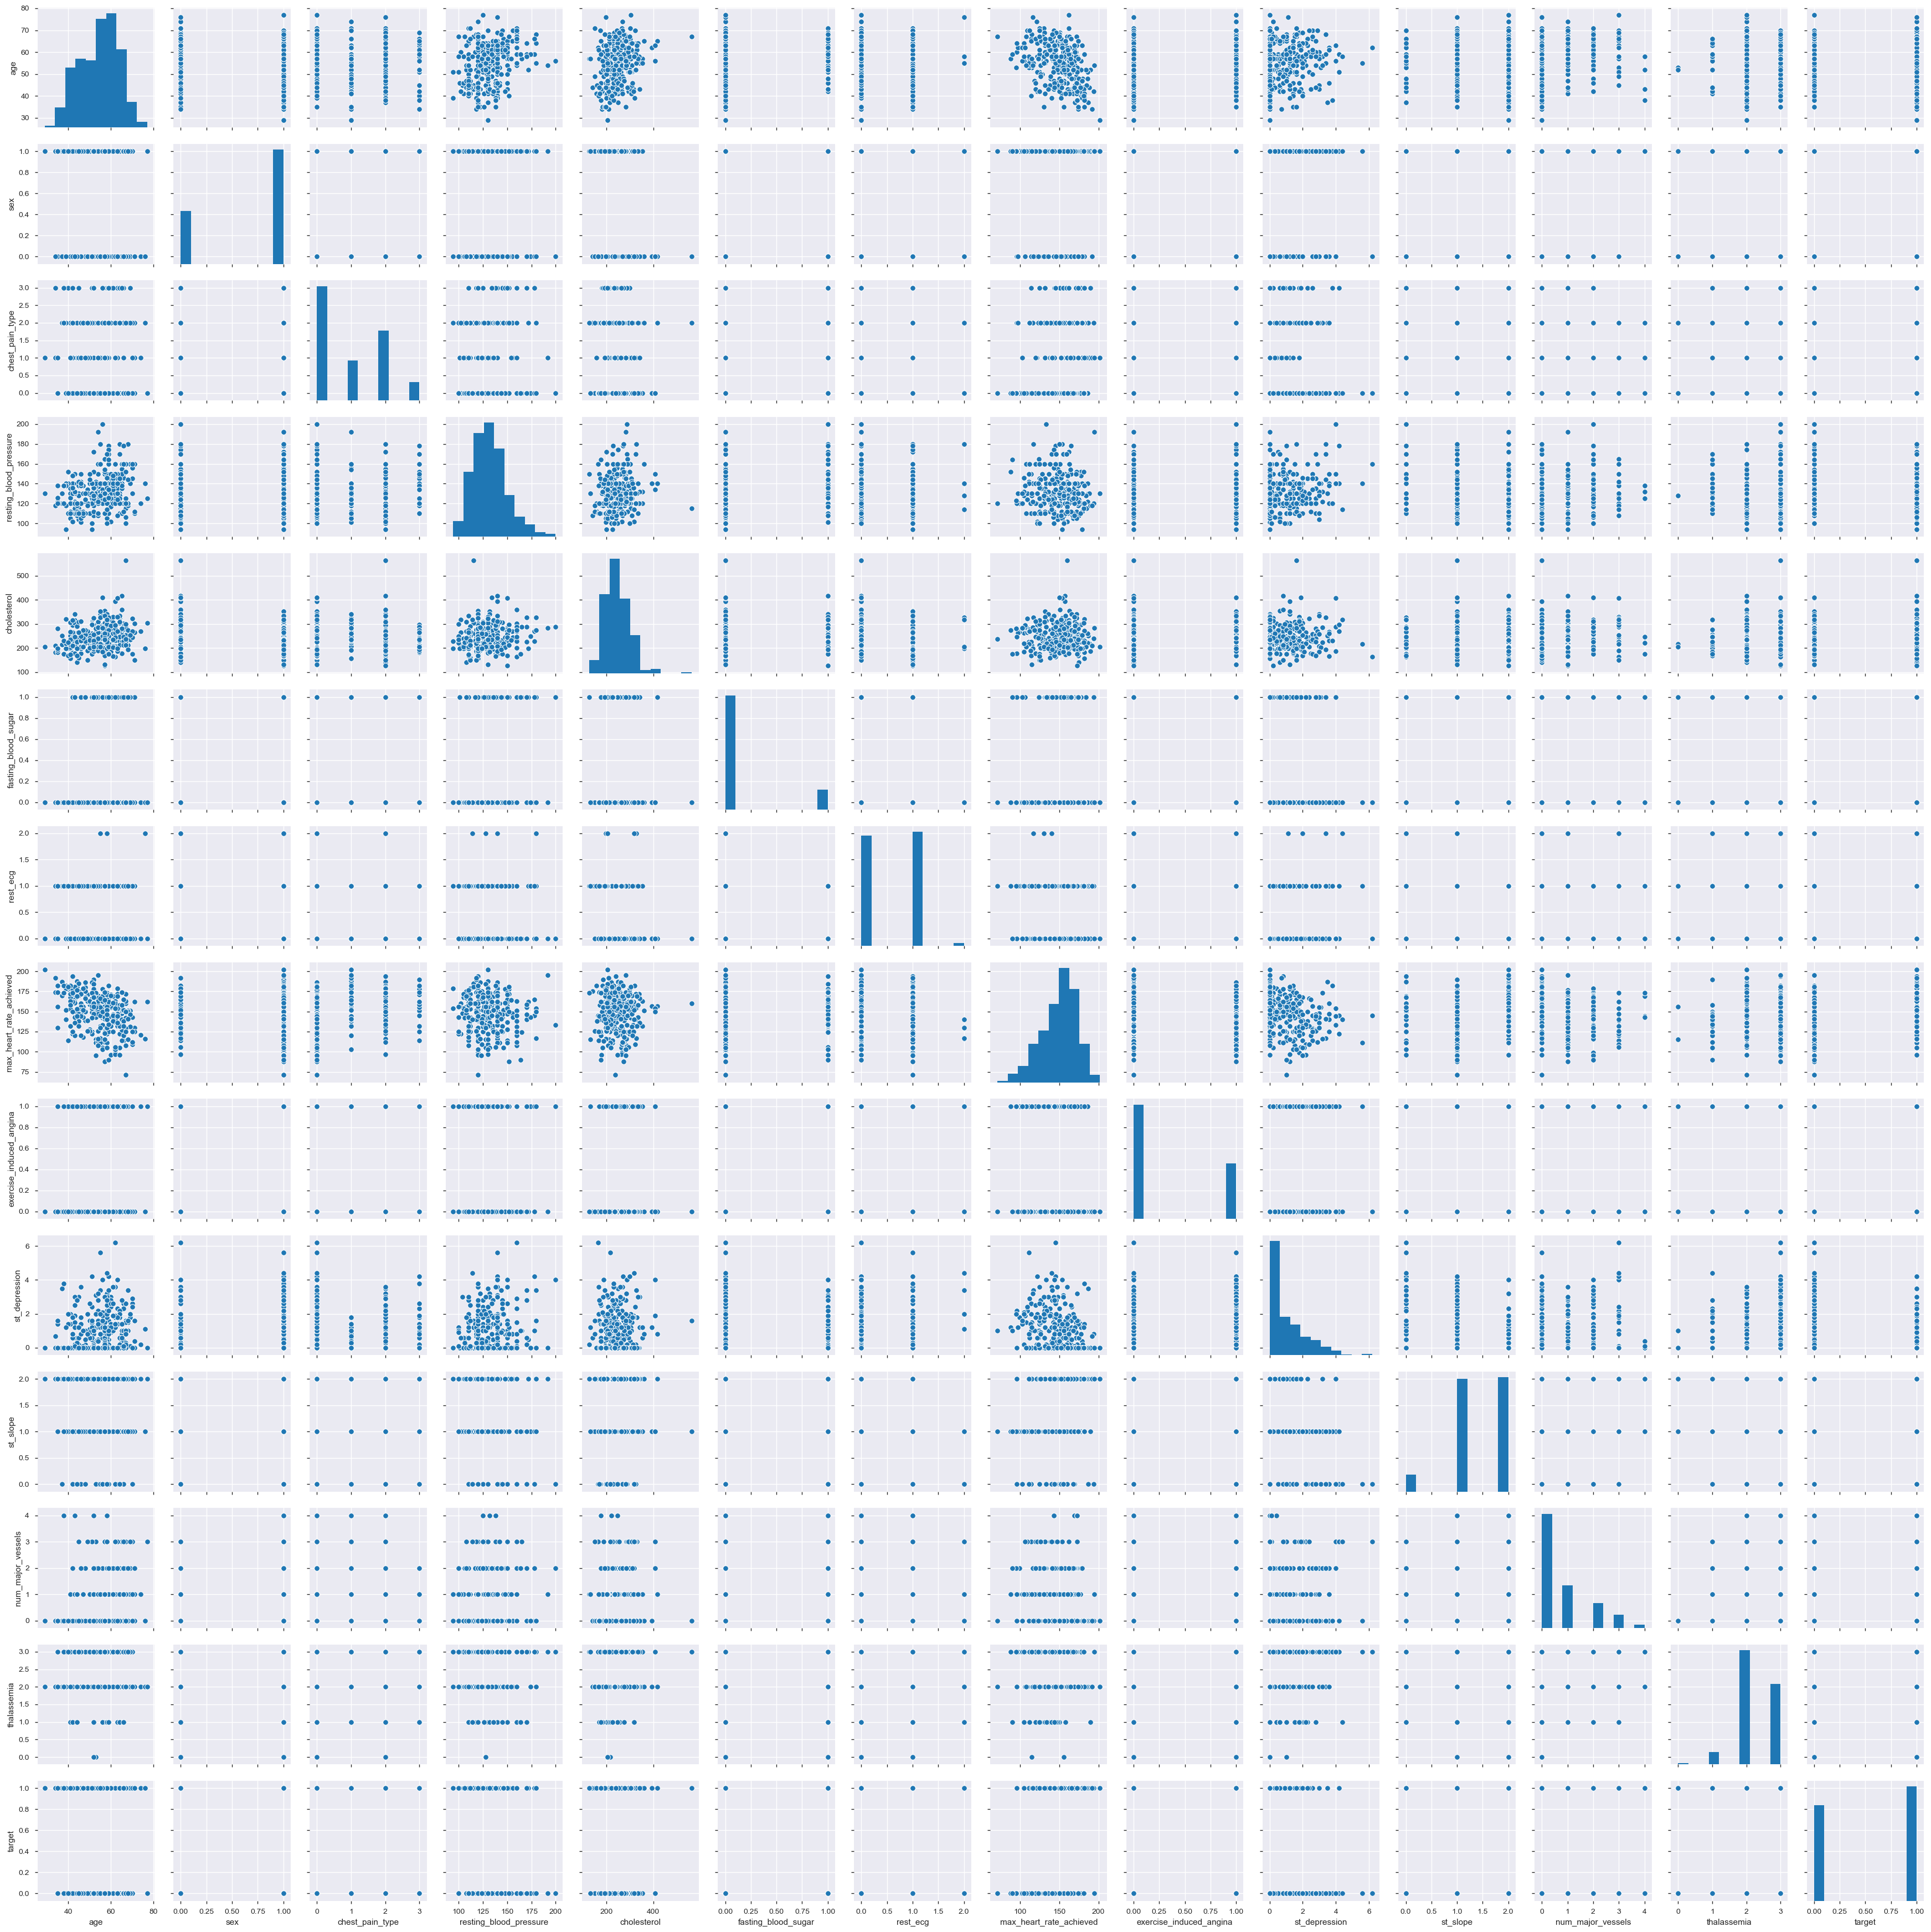

In [317]:
sns.pairplot(df)
plt.show()

In [318]:
# print(df.dtypes)
# df.head()

In [319]:
df.head()

age  sex  chest_pain_type  resting_blood_pressure  cholesterol  \
0   63    1                3                     145          233   
1   37    1                2                     130          250   
2   41    0                1                     130          204   
3   56    1                1                     120          236   
4   57    0                0                     120          354   

   fasting_blood_sugar  rest_ecg  max_heart_rate_achieved  \
0                    1         0                      150   
1                    0         1                      187   
2                    0         0                      172   
3                    0         1                      178   
4                    0         1                      163   

   exercise_induced_angina  st_depression  st_slope  num_major_vessels  \
0                        0            2.3         0                  0   
1                        0            3.5         0                  0   
2                        0            1.4         2                  0   
3                        0            0.8         2                  0   
4                        1            0.6         2                  0   

   thalassemia  target  
0            1       1  
1            2       1  
2            2       1  
3            2       1  
4            2       1

In [320]:
## Swarm plots
## Lazy Predict

## Data Preprocessing for Modeling

In [321]:
df['sex'][df['sex'] == 0] = 'female'
df['sex'][df['sex'] == 1] = 'male'

df['chest_pain_type'][df['chest_pain_type'] == 1] = 'typical angina'
df['chest_pain_type'][df['chest_pain_type'] == 2] = 'atypical angina'
df['chest_pain_type'][df['chest_pain_type'] == 3] = 'non-anginal pain'
df['chest_pain_type'][df['chest_pain_type'] == 4] = 'asymptomatic'

df['fasting_blood_sugar'][df['fasting_blood_sugar'] == 0] = 'lower than 120mg/ml'
df['fasting_blood_sugar'][df['fasting_blood_sugar'] == 1] = 'greater than 120mg/ml'

df['rest_ecg'][df['rest_ecg'] == 0] = 'normal'
df['rest_ecg'][df['rest_ecg'] == 1] = 'ST-T wave abnormality'
df['rest_ecg'][df['rest_ecg'] == 2] = 'left ventricular hypertrophy'

df['exercise_induced_angina'][df['exercise_induced_angina'] == 0] = 'no'
df['exercise_induced_angina'][df['exercise_induced_angina'] == 1] = 'yes'

df['st_slope'][df['st_slope'] == 1] = 'upsloping'
df['st_slope'][df['st_slope'] == 2] = 'flat'
df['st_slope'][df['st_slope'] == 3] = 'downsloping'

df['thalassemia'][df['thalassemia'] == 1] = 'normal'
df['thalassemia'][df['thalassemia'] == 2] = 'fixed defect'
df['thalassemia'][df['thalassemia'] == 3] = 'reversable defect'

In [322]:
df['sex'] = df['sex'].astype('object')
df['chest_pain_type'] = df['chest_pain_type'].astype('object')
df['fasting_blood_sugar'] = df['fasting_blood_sugar'].astype('object')
df['rest_ecg'] = df['rest_ecg'].astype('object')
df['exercise_induced_angina'] = df['exercise_induced_angina'].astype('object')
df['st_slope'] = df['st_slope'].astype('object')
df['thalassemia'] = df['thalassemia'].astype('object')

In [323]:
df.dtypes

age                          int64
sex                         object
chest_pain_type             object
resting_blood_pressure       int64
cholesterol                  int64
fasting_blood_sugar         object
rest_ecg                    object
max_heart_rate_achieved      int64
exercise_induced_angina     object
st_depression              float64
st_slope                    object
num_major_vessels            int64
thalassemia                 object
target                       int64
dtype: object

Now let's create dummy variables for our categorical variables.

In [324]:
# remember to drop the first column when hot encoding
df = pd.get_dummies(df, drop_first=True)

In [325]:
# Let's check what our data set looks like now
print(df.shape)
df.head()

(303, 20)


age  resting_blood_pressure  cholesterol  max_heart_rate_achieved  \
0   63                     145          233                      150   
1   37                     130          250                      187   
2   41                     130          204                      172   
3   56                     120          236                      178   
4   57                     120          354                      163   

   st_depression  num_major_vessels  target  sex_male  \
0            2.3                  0       1         1   
1            3.5                  0       1         1   
2            1.4                  0       1         0   
3            0.8                  0       1         1   
4            0.6                  0       1         0   

   chest_pain_type_atypical angina  chest_pain_type_non-anginal pain  \
0                                0                                 1   
1                                1                                 0   
2                                0                                 0   
3                                0                                 0   
4                                0                                 0   

   chest_pain_type_typical angina  fasting_blood_sugar_lower than 120mg/ml  \
0                               0                                        0   
1                               0                                        1   
2                               1                                        1   
3                               1                                        1   
4                               0                                        1   

   rest_ecg_left ventricular hypertrophy  rest_ecg_normal  \
0                                      0                1   
1                                      0                0   
2                                      0                1   
3                                      0                0   
4                                      0                0   

   exercise_induced_angina_yes  st_slope_flat  st_slope_upsloping  \
0                            0              0                   0   
1                            0              0                   0   
2                            0              1                   0   
3                            0              1                   0   
4                            1              1                   0   

   thalassemia_fixed defect  thalassemia_normal  thalassemia_reversable defect  
0                         0                   1                              0  
1                         1                   0                              0  
2                         1                   0                              0  
3                         1                   0                              0  
4                         1                   0                              0

In [326]:
features = df.drop(['target'], axis=1).columns
print(features)

Index(['age', 'resting_blood_pressure', 'cholesterol',
       'max_heart_rate_achieved', 'st_depression', 'num_major_vessels',
       'sex_male', 'chest_pain_type_atypical angina',
       'chest_pain_type_non-anginal pain', 'chest_pain_type_typical angina',
       'fasting_blood_sugar_lower than 120mg/ml',
       'rest_ecg_left ventricular hypertrophy', 'rest_ecg_normal',
       'exercise_induced_angina_yes', 'st_slope_flat', 'st_slope_upsloping',
       'thalassemia_fixed defect', 'thalassemia_normal',
       'thalassemia_reversable defect'],
      dtype='object')


We can see we went from having 14 columns to having 20 columns. Now let's create our X and y 

In [327]:
y = df.target.values
X = df.drop(['target'], axis = 1).values

Normalize the data

In [328]:
# Standardize the features
X = StandardScaler().fit_transform(X)

# Preview X
pd.DataFrame(data=X, columns=features).head()

age  resting_blood_pressure  cholesterol  max_heart_rate_achieved  \
0  0.952197                0.763956    -0.256334                 0.015443   
1 -1.915313               -0.092738     0.072199                 1.633471   
2 -1.474158               -0.092738    -0.816773                 0.977514   
3  0.180175               -0.663867    -0.198357                 1.239897   
4  0.290464               -0.663867     2.082050                 0.583939   

   st_depression  num_major_vessels  sex_male  \
0       1.087338          -0.714429  0.681005   
1       2.122573          -0.714429  0.681005   
2       0.310912          -0.714429 -1.468418   
3      -0.206705          -0.714429  0.681005   
4      -0.379244          -0.714429 -1.468418   

   chest_pain_type_atypical angina  chest_pain_type_non-anginal pain  \
0                        -0.634648                          3.489114   
1                         1.575677                         -0.286606   
2                        -0.634648                         -0.286606   
3                        -0.634648                         -0.286606   
4                        -0.634648                         -0.286606   

   chest_pain_type_typical angina  fasting_blood_sugar_lower than 120mg/ml  \
0                       -0.444554                                -2.394438   
1                       -0.444554                                 0.417635   
2                        2.249444                                 0.417635   
3                        2.249444                                 0.417635   
4                       -0.444554                                 0.417635   

   rest_ecg_left ventricular hypertrophy  rest_ecg_normal  \
0                              -0.115663         1.030158   
1                              -0.115663        -0.970725   
2                              -0.115663         1.030158   
3                              -0.115663        -0.970725   
4                              -0.115663        -0.970725   

   exercise_induced_angina_yes  st_slope_flat  st_slope_upsloping  \
0                    -0.696631      -0.939142           -0.926766   
1                    -0.696631      -0.939142           -0.926766   
2                    -0.696631       1.064802           -0.926766   
3                    -0.696631       1.064802           -0.926766   
4                     1.435481       1.064802           -0.926766   

   thalassemia_fixed defect  thalassemia_normal  thalassemia_reversable defect  
0                 -1.100763            3.979112                      -0.793116  
1                  0.908461           -0.251312                      -0.793116  
2                  0.908461           -0.251312                      -0.793116  
3                  0.908461           -0.251312                      -0.793116  
4                  0.908461           -0.251312                      -0.793116

In [95]:
#X = (X - np.min(X)) / (np.max(X) - np.min(X)).values

In [96]:
#X.head()

age  resting_blood_pressure  cholesterol  max_heart_rate_achieved  \
0  0.708333                0.481132     0.244292                 0.603053   
1  0.166667                0.339623     0.283105                 0.885496   
2  0.250000                0.339623     0.178082                 0.770992   
3  0.562500                0.245283     0.251142                 0.816794   
4  0.583333                0.245283     0.520548                 0.702290   

   st_depression  num_major_vessels  sex_male  \
0       0.370968                0.0       1.0   
1       0.564516                0.0       1.0   
2       0.225806                0.0       0.0   
3       0.129032                0.0       1.0   
4       0.096774                0.0       0.0   

   chest_pain_type_atypical angina  chest_pain_type_non-anginal pain  \
0                              0.0                               1.0   
1                              1.0                               0.0   
2                              0.0                               0.0   
3                              0.0                               0.0   
4                              0.0                               0.0   

   chest_pain_type_typical angina  fasting_blood_sugar_lower than 120mg/ml  \
0                             0.0                                      0.0   
1                             0.0                                      1.0   
2                             1.0                                      1.0   
3                             1.0                                      1.0   
4                             0.0                                      1.0   

   rest_ecg_left ventricular hypertrophy  rest_ecg_normal  \
0                                    0.0              1.0   
1                                    0.0              0.0   
2                                    0.0              1.0   
3                                    0.0              0.0   
4                                    0.0              0.0   

   exercise_induced_angina_yes  st_slope_flat  st_slope_upsloping  \
0                          0.0            0.0                 0.0   
1                          0.0            0.0                 0.0   
2                          0.0            1.0                 0.0   
3                          0.0            1.0                 0.0   
4                          1.0            1.0                 0.0   

   thalassemia_fixed defect  thalassemia_normal  thalassemia_reversable defect  
0                       0.0                 1.0                            0.0  
1                       1.0                 0.0                            0.0  
2                       1.0                 0.0                            0.0  
3                       1.0                 0.0                            0.0  
4                       1.0                 0.0                            0.0

We will split our data so that 80% of our data is for training and 20% is for testing.

In [371]:
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)
X_train, X_test, y_train, y_test = train_test_split(df.drop('target', 1), df['target'], test_size = .2, random_state=10) #split the data

In [361]:
# Transpose matrices
X_train = X_train.T
y_train = y_train.T
X_test = X_test.T
y_test = y_test.T

## Principal Component Analysis (PCA)

May remove PCA

In [268]:
# pca=PCA().fit(X_train)
# print(pca.explained_variance_ratio_)
# print()
# print(X_train.columns.values.tolist())
# print(pca.components_)

In [269]:
# cumulative=np.cumsum(pca.explained_variance_ratio_)
# plt.step([i for i in range(len(cumulative))],cumulative)
# plt.show()

In [270]:
# pca = PCA(n_components=8)
# pca.fit(X_train)
# reduced_data_train = pca.transform(X_train)
# #inverse_data = pca.inverse_transform(reduced_data)
# plt.scatter(reduced_data_train[:, 0], reduced_data_train[:, 1], label='reduced')
# plt.xlabel('First Principal Component')
# plt.ylabel('Second Principal Component')
# plt.show()

In [271]:
# pca = PCA(n_components=8)
# pca.fit(X_test)
# reduced_data_test = pca.transform(X_test)
# #inverse_data = pca.inverse_transform(reduced_data)
# plt.scatter(reduced_data_test[:, 0], reduced_data_test[:, 1], label='reduced')
# plt.xlabel('First Principal Component')
# plt.ylabel('Second Principal Component')
# plt.show()

In [272]:
# reduced_data_train = pd.DataFrame(reduced_data_train, columns=['Dim1', 'Dim2','Dim3','Dim4','Dim5','Dim6','Dim7','Dim8'])
# reduced_data_test = pd.DataFrame(reduced_data_test, columns=['Dim1', 'Dim2','Dim3','Dim4','Dim5','Dim6','Dim7','Dim8'])
# X_train=reduced_data_train
# X_test=reduced_data_test

In [273]:
# def plot_roc_(false_positive_rate,true_positive_rate,roc_auc):
#     plt.figure(figsize=(5,5))
#     plt.title('Receiver Operating Characteristic')
#     plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
#     plt.legend(loc = 'lower right')
#     plt.plot([0, 1], [0, 1],linestyle='--')
#     plt.axis('tight')
#     plt.ylabel('True Positive Rate')
#     plt.xlabel('False Positive Rate')
#     plt.show()
    
# def plot_feature_importances(gbm):
#     n_features = X_train.shape[1]
#     plt.barh(range(n_features), gbm.feature_importances_, align='center')
#     plt.yticks(np.arange(n_features), X_train.columns)
#     plt.xlabel("Feature importance")
#     plt.ylabel("Feature")
#     plt.ylim(-1, n_features)

In [274]:
# combine_features_list=[
#     ('Dim1','Dim2','Dim3'),
#     ('Dim4','Dim5','Dim5','Dim6'),
#     ('Dim7','Dim8','Dim1'),
#     ('Dim4','Dim8','Dim5')
# ]

# Model 1: Logistic Regression (using sklearn)

In [372]:
# from sklearn.linear_model import LogisticRegression

accuracies = {}

lr = LogisticRegression()
lr.fit(X_train,y_train)
acc = lr.score(X_test,y_test)*100

accuracies['Logistic Regression'] = acc
print("Test Accuracy {:.2f}%".format(acc))

Test Accuracy 80.33%


Our model only works with 80.33% accuracy.

# Random Forest

In [373]:
RFC = RandomForestClassifier(max_depth=5)
RFC.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=5, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [374]:
estimator = RFC.estimators_[1]
feature_names = [i for i in X_train.columns]

y_train_str = y_train.astype('str')
y_train_str[y_train_str == '0'] = 'no disease'
y_train_str[y_train_str == '1'] = 'disease'
y_train_str = y_train_str.values

In [375]:
#code from https://towardsdatascience.com/how-to-visualize-a-decision-tree-from-a-random-forest-in-python-using-scikit-learn-38ad2d75f21c

export_graphviz(estimator, out_file='tree.dot', 
                feature_names = feature_names,
                class_names = y_train_str,
                rounded = True, proportion = True, 
                label='root',
                precision = 2, filled = True)

from subprocess import call
call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi=600'])

from IPython.display import Image
Image(filename = 'tree.png')

In [381]:
y_predict = RFC.predict(X_test)
y_pred_quant = RFC.predict_proba(X_test)[:, 1]
y_pred_bin = RFC.predict(X_test)

In [382]:
confusion_matrix = confusion_matrix(y_test, y_pred_bin)
confusion_matrix

TypeError: 'numpy.ndarray' object is not callable

In medical diagnosis, test sensitivity is the ability of a test to correctly identify those with the disease (true positive rate), whereas test specificity is the ability of the test to correctly identify those without the disease (true negative rate).

In [ ]:
total=sum(sum(confusion_matrix))

sensitivity = confusion_matrix[0,0]/(confusion_matrix[0,0]+confusion_matrix[1,0])
print('Sensitivity : ', sensitivity )

specificity = confusion_matrix[1,1]/(confusion_matrix[1,1]+confusion_matrix[0,1])
print('Specificity : ', specificity)

In [ ]:
# Check with Receiver Operator Curve (ROC)

fpr, tpr, thresholds = roc_curve(y_test, y_pred_quant)

fig, ax = plt.subplots()
ax.plot(fpr, tpr)
ax.plot([0, 1], [0, 1], transform=ax.transAxes, ls="--", c=".3")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.rcParams['font.size'] = 12
plt.title('ROC curve for heart disease classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

Another common metric is the Area Under the Curve, or AUC. This is a convenient way to capture the performance of a model in a single number, although it's not without certain issues. As a rule of thumb, an AUC can be classed as follows,

> - 0.90 - 1.00 = excellent 
> - 0.80 - 0.90 = good
> - 0.70 - 0.80 = fair
> - 0.60 - 0.70 = poor
> - 0.50 - 0.60 = fail

In [340]:
auc(fpr, tpr)

0.8538461538461539

In [341]:
perm = PermutationImportance(model, random_state=1).fit(X_test, y_test)
eli5.show_weights(perm, feature_names = X_test.columns.tolist())

# Model 2: K-Nearest Neighbour (KNN) Classification

In [342]:
knn = KNeighborsClassifier(n_neighbors = 2)  # n_neighbors means k
knn.fit(X_train, y_train)
prediction = knn.predict(X_test)

print("{} NN Score: {:.2f}%".format(2, knn.score(X_test, y_test)*100))

2 NN Score: 63.93%


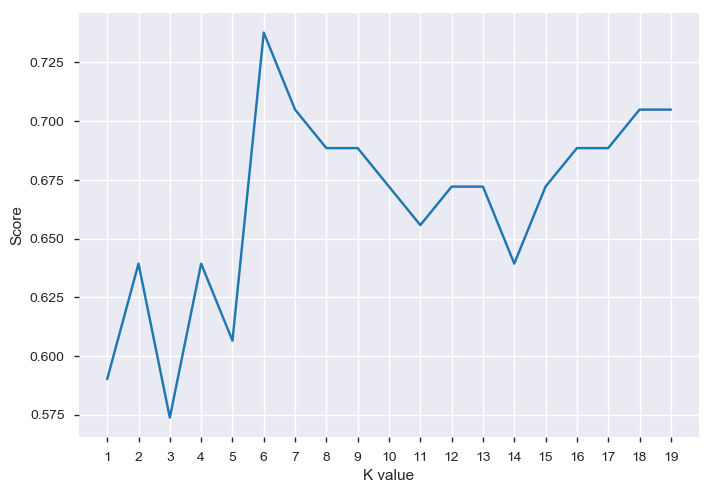

Maximum KNN Score is 73.77%


In [343]:
# try ro find best k value
scoreList = []
for i in range(1,20):
    knn2 = KNeighborsClassifier(n_neighbors = i)  # n_neighbors means k
    knn2.fit(X_train, y_train)
    scoreList.append(knn2.score(X_test, y_test))
    
plt.plot(range(1,20), scoreList)
plt.xticks(np.arange(1,20,1))
plt.xlabel("K value")
plt.ylabel("Score")
plt.show()

acc = max(scoreList)*100
accuracies['KNN'] = acc
print("Maximum KNN Score is {:.2f}%".format(acc))

In [344]:
y_predict = knn.predict(X_test)
y_pred_quant = knn.predict_proba(X_test)[:, 1]
y_pred_bin = knn.predict(X_test)

In [345]:
confusion_matrix = confusion_matrix(y_test, y_pred_bin)
confusion_matrix

TypeError: 'numpy.ndarray' object is not callable

In [346]:
total=sum(sum(confusion_matrix))

sensitivity = confusion_matrix[0,0]/(confusion_matrix[0,0]+confusion_matrix[1,0])
print('Sensitivity : ', sensitivity )

specificity = confusion_matrix[1,1]/(confusion_matrix[1,1]+confusion_matrix[0,1])
print('Specificity : ', specificity)

Sensitivity :  0.6585365853658537
Specificity :  0.6


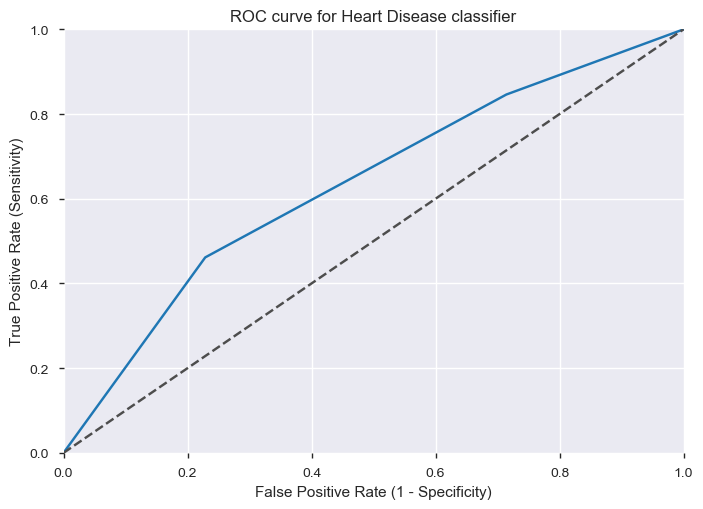

In [348]:
# Check with Receiver Operator Curve (ROC)

fpr, tpr, thresholds = roc_curve(y_test, y_pred_quant)

fig, ax = plt.subplots()
ax.plot(fpr, tpr)
ax.plot([0, 1], [0, 1], transform=ax.transAxes, ls="--", c=".3")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.rcParams['font.size'] = 12
plt.title('ROC curve for Heart Disease classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

# Model 3: Support Vector Model (SVM)

# Model 4: Naive Bayes

# Model 5: Gradient Boosting Machine

# Model 6: Decision Tree